<a href="https://colab.research.google.com/github/Mainabryan/-DropNet-Predicting-University-Dropout-Risk-in-Kenya/blob/main/Retail_Sales_machine_leanring_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import the necessrty libariries

In [3]:
# Core data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # for interactive time-series plots

# Machine Learning / Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Time-Series Forecasting
from prophet import Prophet   # Facebook (Meta) Prophet
import statsmodels.api as sm  # ARIMA, SARIMA
import xgboost as xgb         # XGBoost models


#Load the dataset

In [5]:
data = pd.read_csv('/content/restaurant_sales_dataset.csv')

##ETL

In [6]:
# HEAD
data.head()

,Date,DayOfWeek,DailySales,OrdersCount,Weather,HolidayOrEvent,StaffCount
0,2024-01-01,Monday,1058.0,46,Snowy,NaN,3
1,2024-01-02,Tuesday,4272.0,109,Cloudy,NaN,6
2,2024-01-03,Wednesday,3592.0,95,Cloudy,NaN,5
3,2024-01-04,Thursday,966.0,38,Cloudy,NaN,3
4,2024-01-05,Friday,4926.0,242,Snowy,NaN,9


In [7]:
#tail
data.tail()

,Date,DayOfWeek,DailySales,OrdersCount,Weather,HolidayOrEvent,StaffCount
364,2024-12-30,Monday,2390.0,179,Rainy,NaN,9
365,2024-12-31,Tuesday,5479.0,183,Snowy,New Year's Eve,4
366,2024-02-16,Friday,1275.0,36,Snowy,NaN,3
367,2024-10-30,Wednesday,2074.0,120,Rainy,NaN,6
368,2024-04-09,Tuesday,3816.0,132,Rainy,NaN,8


In [9]:
data.isnull().sum()

,0
Date,0
DayOfWeek,0
DailySales,10
OrdersCount,0
Weather,0
HolidayOrEvent,363
StaffCount,0


In [10]:
data.duplicated().sum()

np.int64(3)

#3 CLEANIG THE DATASET

In [11]:
data.isnull().sum()

,0
Date,0
DayOfWeek,0
DailySales,10
OrdersCount,0
Weather,0
HolidayOrEvent,363
StaffCount,0


FILL IT WITH  THE MEDIAN

In [16]:
# replace the missing values in daily sales with median
data['DailySales'] = data.groupby('DayOfWeek')['DailySales'].transform(lambda x: x.fillna(x.median()))
# check for the outliers
data['HolidayOrEvent'] = data['HolidayOrEvent'].fillna("None")

# Check the outliers

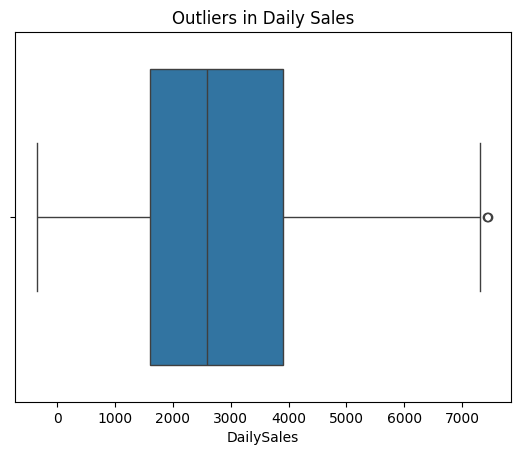

In [18]:
sns.boxplot(x=data['DailySales'])
plt.title("Outliers in Daily Sales")
plt.show()


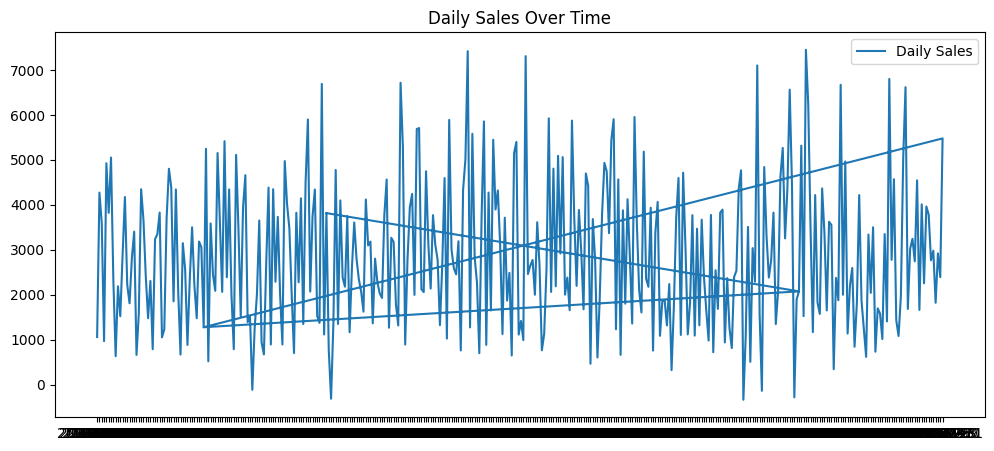

In [20]:
plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['DailySales'], label="Daily Sales")
plt.title("Daily Sales Over Time")
plt.legend()
plt.show()


#EDA (EXPLATORY DATA  ANALYSIS)

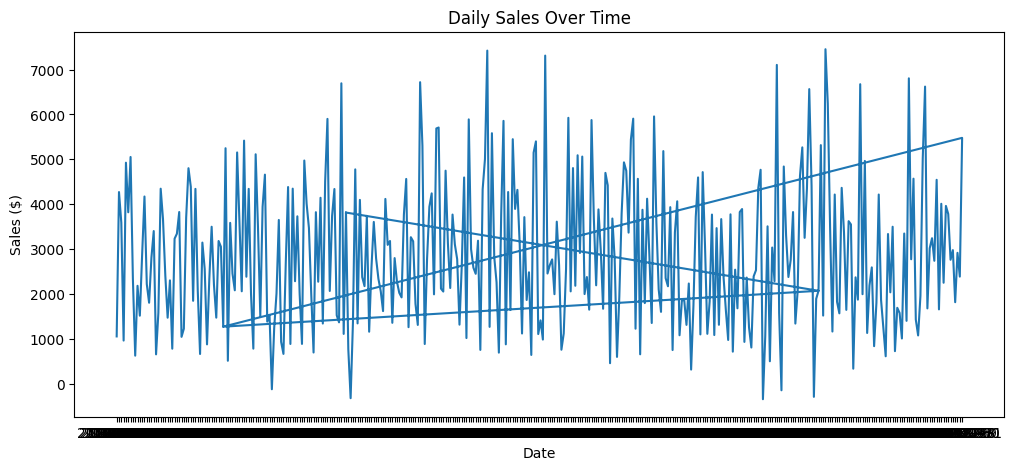

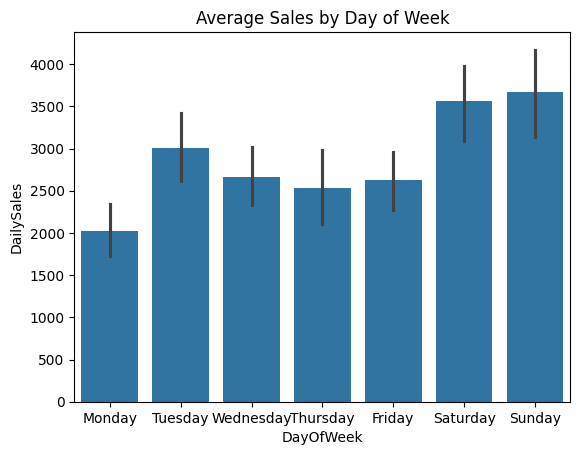

In [22]:
plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['DailySales'])
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.show()

# Sales by weekday
sns.barplot(x="DayOfWeek", y="DailySales", data=data)
plt.title("Average Sales by Day of Week")
plt.show()
